<a href="https://colab.research.google.com/github/srivatsan88/Mastering-Apache-Spark/blob/master/pyspark_ML_Pipeline_and_h2o_AutoML_in_Colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
!wget -q https://downloads.apache.org/spark/spark-2.4.5/spark-2.4.5-bin-hadoop2.7.tgz
!tar xf spark-2.4.5-bin-hadoop2.7.tgz
!pip install -q findspark

In [ ]:
!ls /usr/lib/jvm/

default-java		   java-11-openjdk-amd64     java-8-openjdk-amd64
java-1.11.0-openjdk-amd64  java-1.8.0-openjdk-amd64


In [ ]:
!pip install h2o-pysparkling-2.4

     |████████████████████████████████| 104.1MB 103kB/s 
     |████████████████████████████████| 217.8MB 78kB/s 
     |████████████████████████████████| 204kB 36.4MB/s 
  Created wheel for h2o-pysparkling-2.4: filename=h2o_pysparkling_2.4-3.28.0.4.post1-py2.py3-none-any.whl size=104175809 sha256=16b64c978fa0dde2cbe102a5450904c8d82eb850082d5ac2c68a92294effc2b5
  Stored in directory: /root/.cache/pip/wheels/8e/d6/b8/44815935e7507c0fbb56e84e2242ba6bfc672f4dd2ba7bb75d
  Created wheel for pyspark: filename=pyspark-2.4.5-py2.py3-none-any.whl size=218257927 sha256=99341ab4ebf5b2d2b66b2148d2e986e9f9b34faee527f76d8703e203226d8196
  Stored in directory: /root/.cache/pip/wheels/bf/db/04/61d66a5939364e756eb1c1be4ec5bdce6e04047fc7929a3c3c
Successfully built h2o-pysparkling-2.4 pyspark


In [ ]:
!pip install -U pyarrow

     |████████████████████████████████| 63.2MB 158kB/s 
  Found existing installation: pyarrow 0.14.1
    Uninstalling pyarrow-0.14.1:
      Successfully uninstalled pyarrow-0.14.1


In [ ]:
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-2.4.5-bin-hadoop2.7"

In [ ]:
import findspark
findspark.init()
from pyspark.sql import SparkSession
spark = SparkSession.builder.master("local[*]").getOrCreate()
spark.conf.set("spark.executor.memory", "4g")
spark.conf.set("spark.driver.memory", "4g")
spark.conf.set("spark.memory.fraction","0.9")

In [ ]:
import sys,tempfile, urllib

In [ ]:
BASE_DIR = '/tmp'
OUTPUT_FILE = os.path.join(BASE_DIR, 'credit_data.csv')

In [ ]:
credit_data=urllib.request.urlretrieve('https://archive.ics.uci.edu/ml/machine-learning-databases/credit-screening/crx.data', OUTPUT_FILE)

In [ ]:
!ls

h2ologs  sample_data  spark-2.4.5-bin-hadoop2.7  spark-2.4.5-bin-hadoop2.7.tgz


In [ ]:
credit_df = spark.read.option("inferSchema", "true").csv("/tmp/credit_data.csv", header=False).toDF("c1","c2","c3","c4","c5", "c6", "c7", "c8", "c9", "c10", "c11", "c12", "c13", "c14", "c15","c16")

In [ ]:
credit_df.show()

+---+-----+------+---+---+---+---+-----+---+---+---+---+---+-----+-----+---+
| c1|   c2|    c3| c4| c5| c6| c7|   c8| c9|c10|c11|c12|c13|  c14|  c15|c16|
+---+-----+------+---+---+---+---+-----+---+---+---+---+---+-----+-----+---+
|  b|30.83|   0.0|  u|  g|  w|  v| 1.25|  t|  t|  1|  f|  g|00202|    0|  +|
|  a|58.67|  4.46|  u|  g|  q|  h| 3.04|  t|  t|  6|  f|  g|00043|  560|  +|
|  a|24.50|   0.5|  u|  g|  q|  h|  1.5|  t|  f|  0|  f|  g|00280|  824|  +|
|  b|27.83|  1.54|  u|  g|  w|  v| 3.75|  t|  t|  5|  t|  g|00100|    3|  +|
|  b|20.17| 5.625|  u|  g|  w|  v| 1.71|  t|  f|  0|  f|  s|00120|    0|  +|
|  b|32.08|   4.0|  u|  g|  m|  v|  2.5|  t|  f|  0|  t|  g|00360|    0|  +|
|  b|33.17|  1.04|  u|  g|  r|  h|  6.5|  t|  f|  0|  t|  g|00164|31285|  +|
|  a|22.92|11.585|  u|  g| cc|  v| 0.04|  t|  f|  0|  f|  g|00080| 1349|  +|
|  b|54.42|   0.5|  y|  p|  k|  h| 3.96|  t|  f|  0|  f|  g|00180|  314|  +|
|  b|42.50| 4.915|  y|  p|  w|  v|3.165|  t|  f|  0|  t|  g|00052| 1442|  +|

In [ ]:
credit_df.groupBy("c16").count().show()

+---+-----+
|c16|count|
+---+-----+
|  +|  307|
|  -|  383|
+---+-----+



In [ ]:
from pyspark.sql.functions import isnan, when, count, col
credit_df.select([count(when(isnan(c) | col(c).isNull(), c)).alias(c) for c in credit_df.columns]).show()

+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+
| c1| c2| c3| c4| c5| c6| c7| c8| c9|c10|c11|c12|c13|c14|c15|c16|
+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+
|  0|  0|  0|  0|  0|  0|  0|  0|  0|  0|  0|  0|  0|  0|  0|  0|
+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+



In [ ]:
credit_df=credit_df.withColumn("c16", when(col("c16") == "+", 1).otherwise(0))


In [ ]:
credit_df.show()

+---+-----+------+---+---+---+---+-----+---+---+---+---+---+-----+-----+---+
| c1|   c2|    c3| c4| c5| c6| c7|   c8| c9|c10|c11|c12|c13|  c14|  c15|c16|
+---+-----+------+---+---+---+---+-----+---+---+---+---+---+-----+-----+---+
|  b|30.83|   0.0|  u|  g|  w|  v| 1.25|  t|  t|  1|  f|  g|00202|    0|  1|
|  a|58.67|  4.46|  u|  g|  q|  h| 3.04|  t|  t|  6|  f|  g|00043|  560|  1|
|  a|24.50|   0.5|  u|  g|  q|  h|  1.5|  t|  f|  0|  f|  g|00280|  824|  1|
|  b|27.83|  1.54|  u|  g|  w|  v| 3.75|  t|  t|  5|  t|  g|00100|    3|  1|
|  b|20.17| 5.625|  u|  g|  w|  v| 1.71|  t|  f|  0|  f|  s|00120|    0|  1|
|  b|32.08|   4.0|  u|  g|  m|  v|  2.5|  t|  f|  0|  t|  g|00360|    0|  1|
|  b|33.17|  1.04|  u|  g|  r|  h|  6.5|  t|  f|  0|  t|  g|00164|31285|  1|
|  a|22.92|11.585|  u|  g| cc|  v| 0.04|  t|  f|  0|  f|  g|00080| 1349|  1|
|  b|54.42|   0.5|  y|  p|  k|  h| 3.96|  t|  f|  0|  f|  g|00180|  314|  1|
|  b|42.50| 4.915|  y|  p|  w|  v|3.165|  t|  f|  0|  t|  g|00052| 1442|  1|

In [ ]:
credit_df.printSchema()

root
 |-- c1: string (nullable = true)
 |-- c2: string (nullable = true)
 |-- c3: double (nullable = true)
 |-- c4: string (nullable = true)
 |-- c5: string (nullable = true)
 |-- c6: string (nullable = true)
 |-- c7: string (nullable = true)
 |-- c8: double (nullable = true)
 |-- c9: string (nullable = true)
 |-- c10: string (nullable = true)
 |-- c11: integer (nullable = true)
 |-- c12: string (nullable = true)
 |-- c13: string (nullable = true)
 |-- c14: string (nullable = true)
 |-- c15: integer (nullable = true)
 |-- c16: integer (nullable = false)



In [ ]:
credit_df.describe().show()

+-------+----+-----------------+------------------+----+----+----+----+------------------+----+----+-----------------+----+----+------------------+------------------+------------------+
|summary|  c1|               c2|                c3|  c4|  c5|  c6|  c7|                c8|  c9| c10|              c11| c12| c13|               c14|               c15|               c16|
+-------+----+-----------------+------------------+----+----+----+----+------------------+----+----+-----------------+----+----+------------------+------------------+------------------+
|  count| 690|              690|               690| 690| 690| 690| 690|               690| 690| 690|              690| 690| 690|               690|               690|               690|
|   mean|null|31.56817109144546|4.7587246376811585|null|null|null|null|2.2234057971014476|null|null|              2.4|null|null|184.01477104874445|1017.3855072463768|0.4449275362318841|
| stddev|null|11.95786249827088| 4.978163248528541|null|null|null|null

In [ ]:
from pyspark.sql.types import *

credit_df.select([count(when(isnan(c) | col(c).isNull(), c)).alias(c) for c in credit_df.columns]).show()

+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+
| c1| c2| c3| c4| c5| c6| c7| c8| c9|c10|c11|c12|c13|c14|c15|c16|
+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+
|  0|  0|  0|  0|  0|  0|  0|  0|  0|  0|  0|  0|  0|  0|  0|  0|
+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+



In [ ]:
credit_df.select([count(when(col(c)=='?', c)).alias(c) for c in credit_df.columns]).show()

+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+
| c1| c2| c3| c4| c5| c6| c7| c8| c9|c10|c11|c12|c13|c14|c15|c16|
+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+
| 12| 12|  0|  6|  6|  9|  9|  0|  0|  0|  0|  0|  0| 13|  0|  0|
+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+



In [ ]:
spark.conf.set("spark.sql.execution.arrow.enabled", "true")

crp_df=credit_df.toPandas()

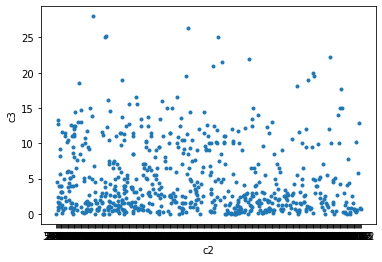

In [ ]:
import matplotlib.pyplot as plt
plt.clf()
plt.plot(crp_df['c2'], crp_df['c3'], '.')
plt.xlabel('c2')
plt.ylabel('c3')
display()

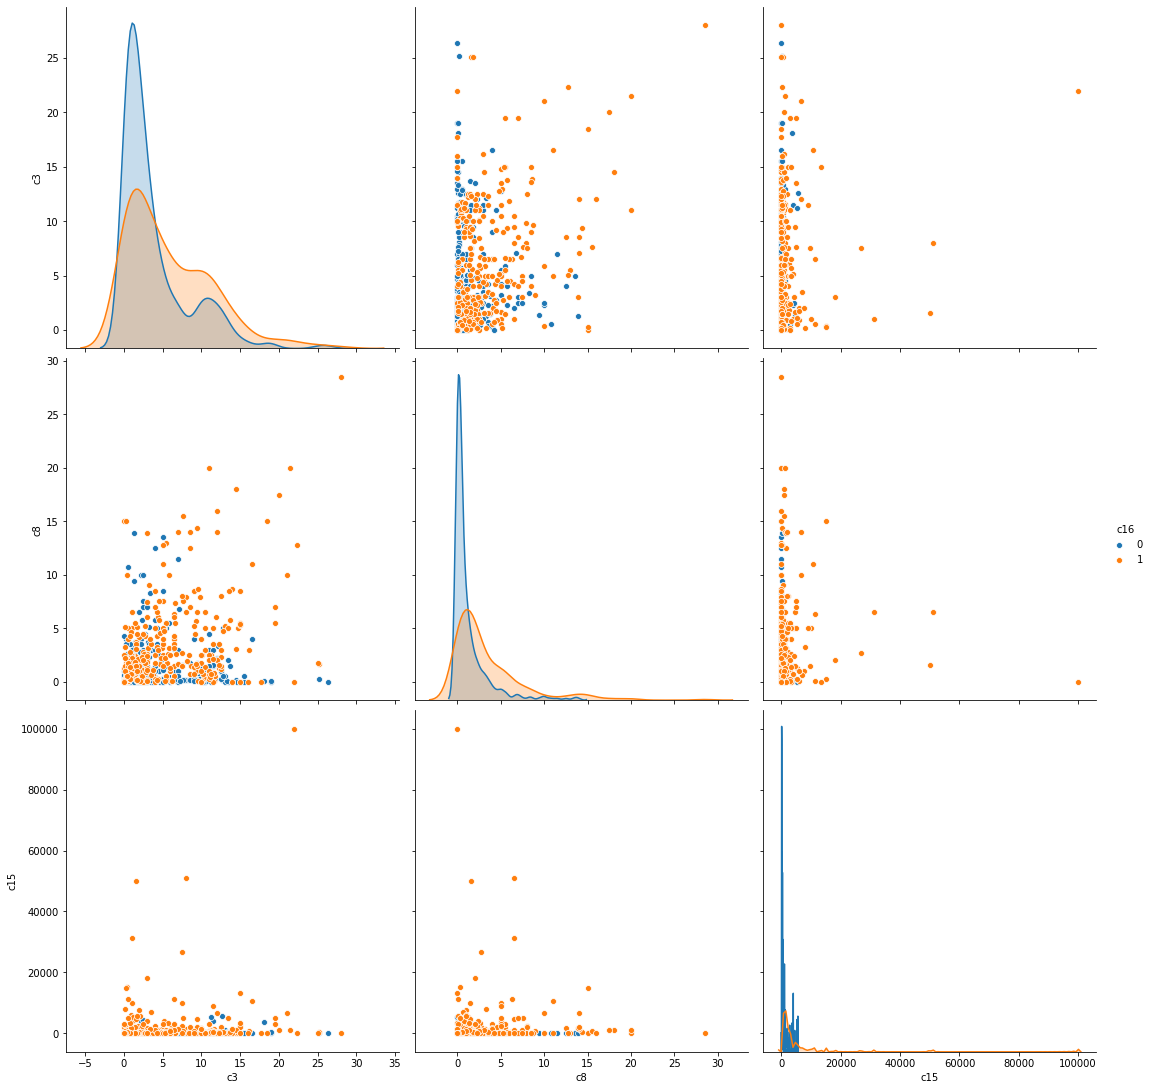

In [ ]:
import seaborn as sns

g = sns.pairplot(crp_df[['c2','c3', 'c8','c14','c15','c16']], hue ='c16', height=5)

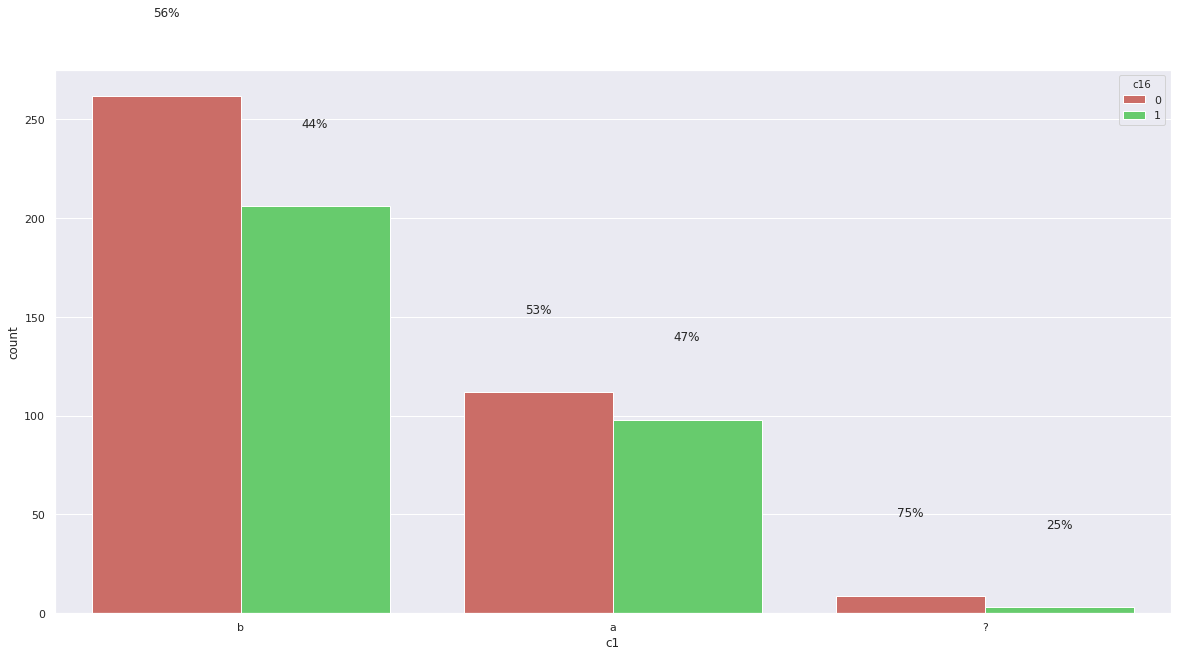

In [ ]:
sns.set(style="darkgrid")
sns.set_palette("hls", 3)
fig, ax = plt.subplots(figsize=(20,10))
ax = sns.countplot(x="c1", hue="c16", data=crp_df)

bars = ax.patches
half = int(len(bars)/2)
left_bars = bars[:half]
right_bars = bars[half:]

for left, right in zip(left_bars, right_bars):
    height_l = left.get_height()
    height_r = right.get_height()
    total = height_l + height_r

    ax.text(left.get_x() + left.get_width()/2., height_l + 40, '{0:.0%}'.format(height_l/total), ha="center")
    ax.text(right.get_x() + right.get_width()/2., height_r + 40, '{0:.0%}'.format(height_r/total), ha="center")

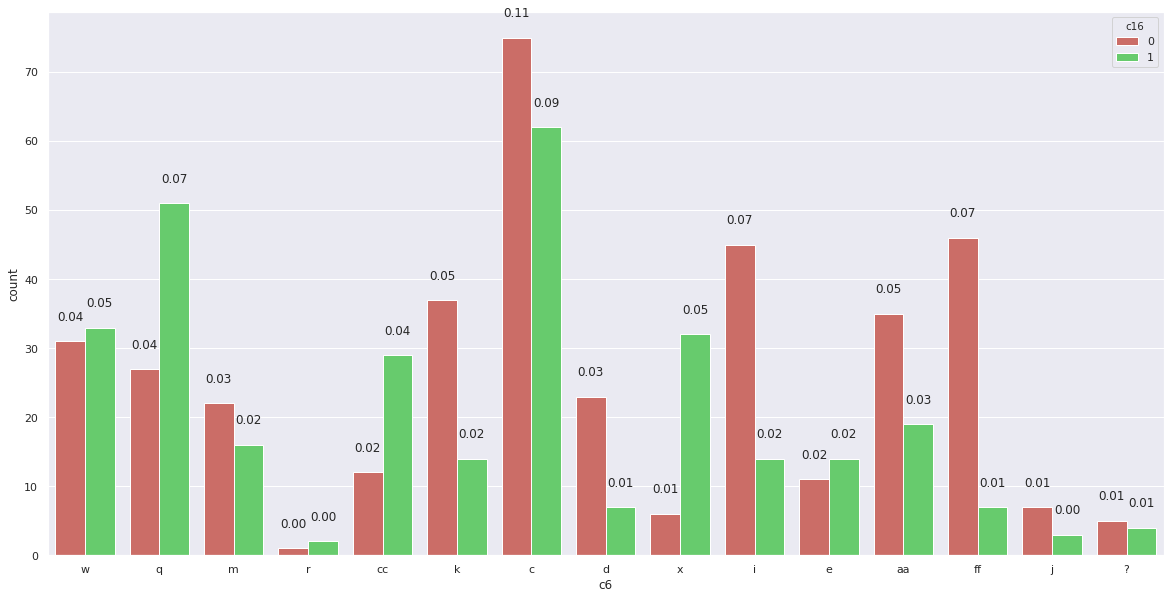

In [ ]:
sns.set(style="darkgrid")
sns.set_palette("hls", 3)
fig, ax = plt.subplots(figsize=(20,10))
ax = sns.countplot(x="c6", hue="c16", data=crp_df)

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format(height/crp_df.shape[0]),
            ha="center") 

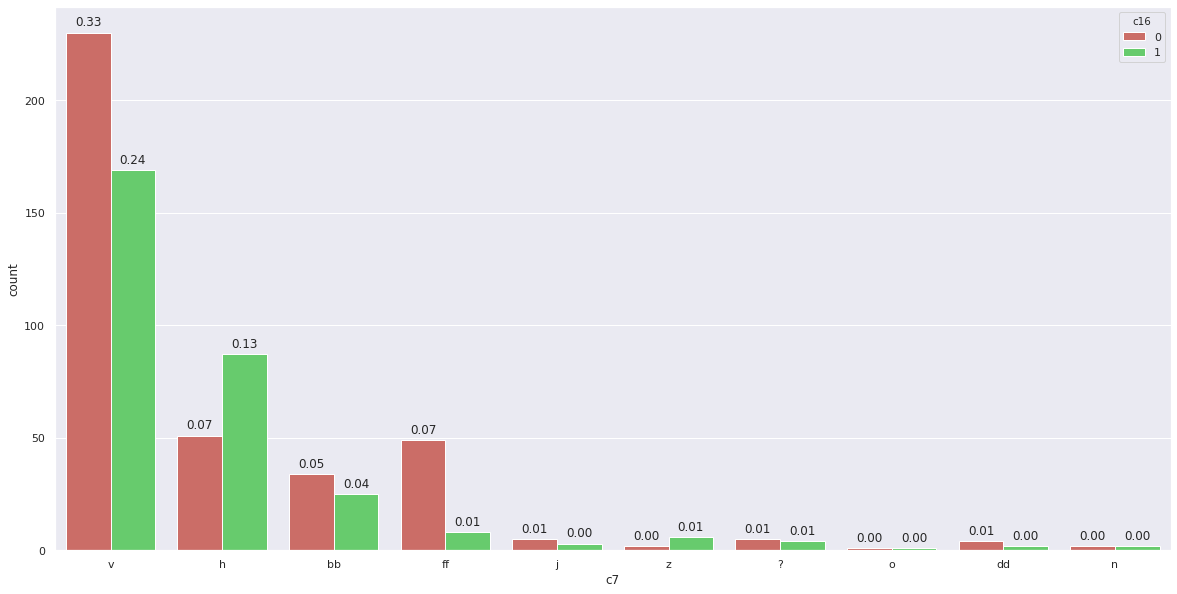

In [ ]:
sns.set(style="darkgrid")
sns.set_palette("hls", 3)
fig, ax = plt.subplots(figsize=(20,10))
ax = sns.countplot(x="c7", hue="c16", data=crp_df)

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format(height/crp_df.shape[0]),
            ha="center") 

In [ ]:
from pyspark.sql.functions import *

credit_df=credit_df.replace('?', None)

In [ ]:
from pyspark.sql.functions import isnan, when, count, col
credit_df.select([count(when(isnan(c) | col(c).isNull(), c)).alias(c) for c in credit_df.columns]).show()

+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+
| c1| c2| c3| c4| c5| c6| c7| c8| c9|c10|c11|c12|c13|c14|c15|c16|
+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+
| 12| 12|  0|  6|  6|  9|  9|  0|  0|  0|  0|  0|  0| 13|  0|  0|
+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+



In [ ]:
credit_df=credit_df.withColumn("c14", col("c14").cast("int")).withColumn("c2", col("c2").cast("double"))

In [ ]:
credit_df.printSchema()

root
 |-- c1: string (nullable = true)
 |-- c2: double (nullable = true)
 |-- c3: double (nullable = true)
 |-- c4: string (nullable = true)
 |-- c5: string (nullable = true)
 |-- c6: string (nullable = true)
 |-- c7: string (nullable = true)
 |-- c8: double (nullable = true)
 |-- c9: string (nullable = true)
 |-- c10: string (nullable = true)
 |-- c11: integer (nullable = true)
 |-- c12: string (nullable = true)
 |-- c13: string (nullable = true)
 |-- c14: integer (nullable = true)
 |-- c15: integer (nullable = true)
 |-- c16: integer (nullable = false)



In [ ]:
credit_df.show()

+---+-----+------+---+---+---+---+-----+---+---+---+---+---+---+-----+---+
| c1|   c2|    c3| c4| c5| c6| c7|   c8| c9|c10|c11|c12|c13|c14|  c15|c16|
+---+-----+------+---+---+---+---+-----+---+---+---+---+---+---+-----+---+
|  b|30.83|   0.0|  u|  g|  w|  v| 1.25|  t|  t|  1|  f|  g|202|    0|  1|
|  a|58.67|  4.46|  u|  g|  q|  h| 3.04|  t|  t|  6|  f|  g| 43|  560|  1|
|  a| 24.5|   0.5|  u|  g|  q|  h|  1.5|  t|  f|  0|  f|  g|280|  824|  1|
|  b|27.83|  1.54|  u|  g|  w|  v| 3.75|  t|  t|  5|  t|  g|100|    3|  1|
|  b|20.17| 5.625|  u|  g|  w|  v| 1.71|  t|  f|  0|  f|  s|120|    0|  1|
|  b|32.08|   4.0|  u|  g|  m|  v|  2.5|  t|  f|  0|  t|  g|360|    0|  1|
|  b|33.17|  1.04|  u|  g|  r|  h|  6.5|  t|  f|  0|  t|  g|164|31285|  1|
|  a|22.92|11.585|  u|  g| cc|  v| 0.04|  t|  f|  0|  f|  g| 80| 1349|  1|
|  b|54.42|   0.5|  y|  p|  k|  h| 3.96|  t|  f|  0|  f|  g|180|  314|  1|
|  b| 42.5| 4.915|  y|  p|  w|  v|3.165|  t|  f|  0|  t|  g| 52| 1442|  1|
|  b|22.08|  0.83|  u|  g

In [ ]:
categorical=['c1','c4','c5','c6','c7','c9','c10','c12','c13']

In [ ]:
crp_df=credit_df.toPandas()

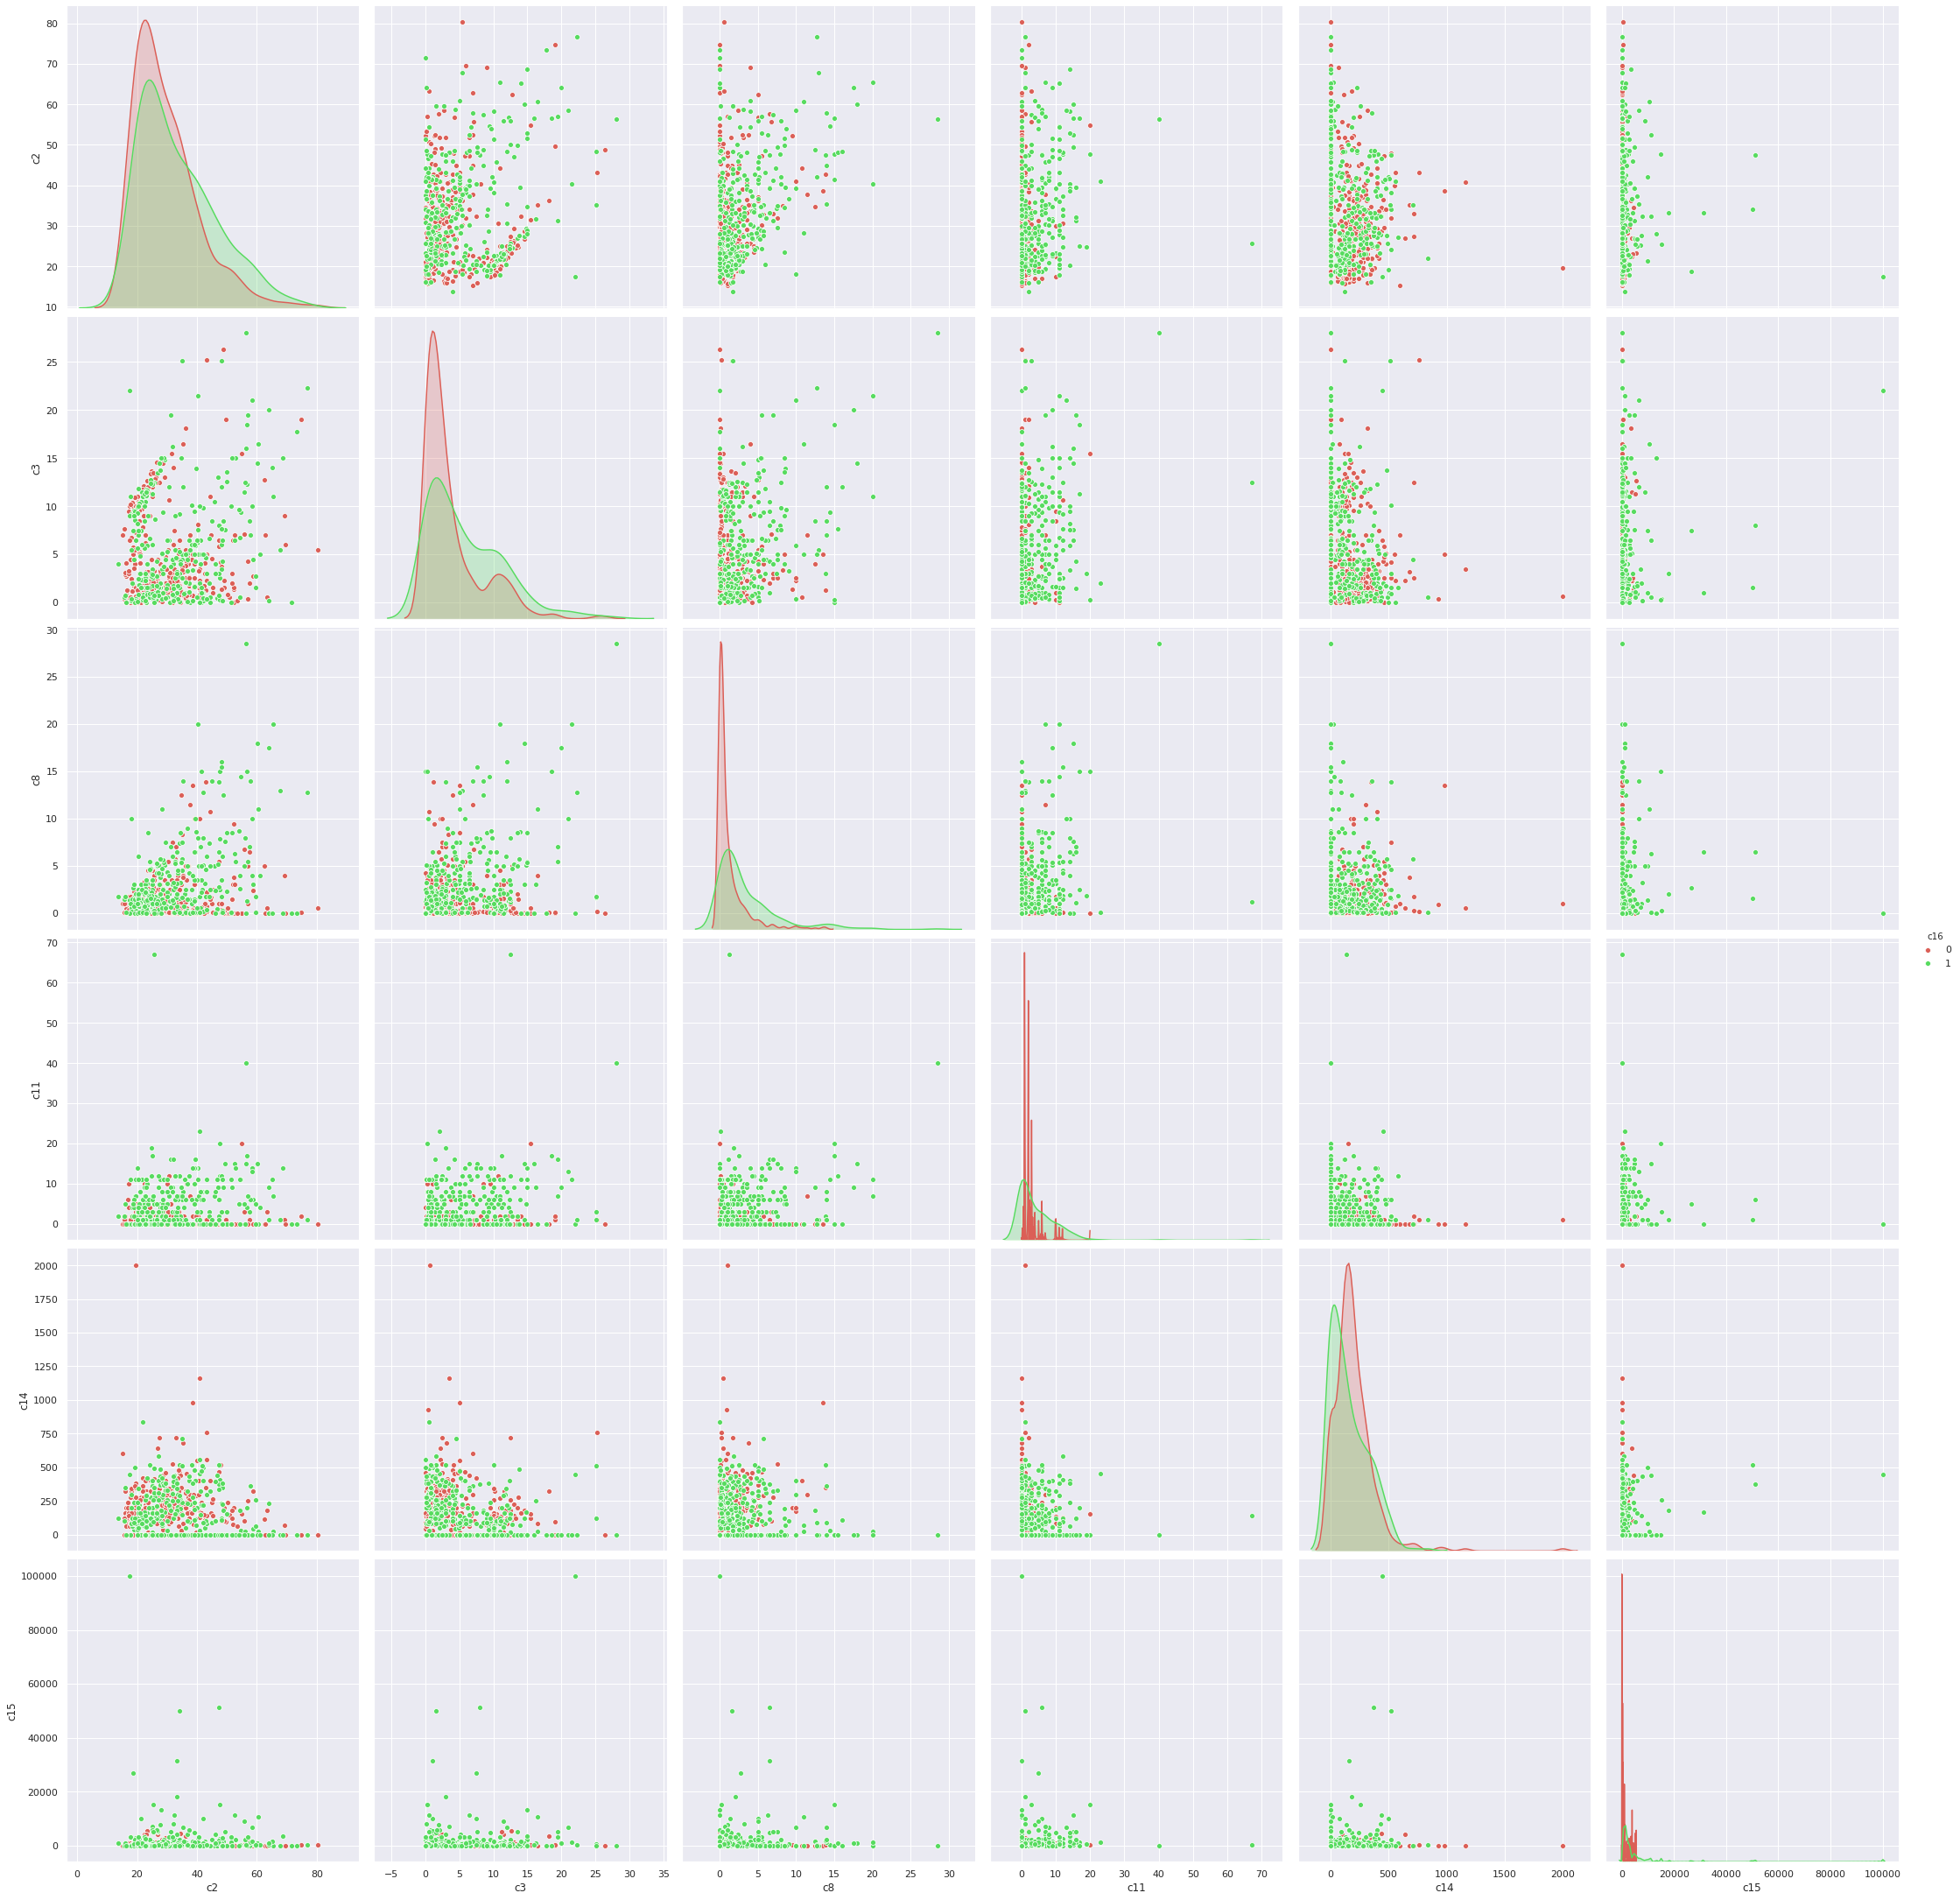

In [ ]:
g = sns.pairplot(crp_df[['c2','c3', 'c8','c11','c14','c15','c16']], hue ='c16', height=5)

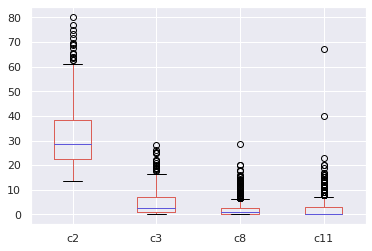

In [ ]:
crp_df[['c2','c3', 'c8','c11']].boxplot()

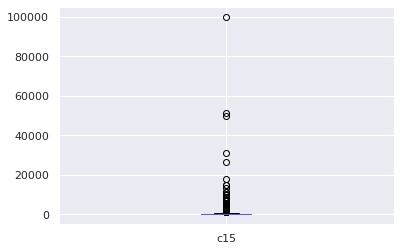

In [ ]:
crp_df[['c15']].boxplot()

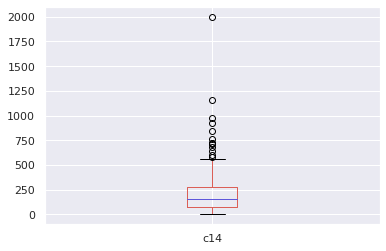

In [ ]:
crp_df[['c14']].boxplot()

In [ ]:
crp_df[['c2','c3', 'c8','c11','c14','c15','c16']].corr()

,c2,c3,c8,c11,c14,c15,c16
c2,1.000000,0.202317,0.395751,0.185912,-0.079812,0.018553,0.162881
c3,0.202317,1.000000,0.298902,0.271207,-0.224242,0.123121,0.206294
c8,0.395751,0.298902,1.000000,0.322330,-0.077163,0.051345,0.322475
c11,0.185912,0.271207,0.322330,1.000000,-0.120096,0.063692,0.406410
c14,-0.079812,-0.224242,-0.077163,-0.120096,1.000000,0.066853,-0.100935
c15,0.018553,0.123121,0.051345,0.063692,0.066853,1.000000,0.175657
c16,0.162881,0.206294,0.322475,0.406410,-0.100935,0.175657,1.000000


In [ ]:
print(len(categorical))

9


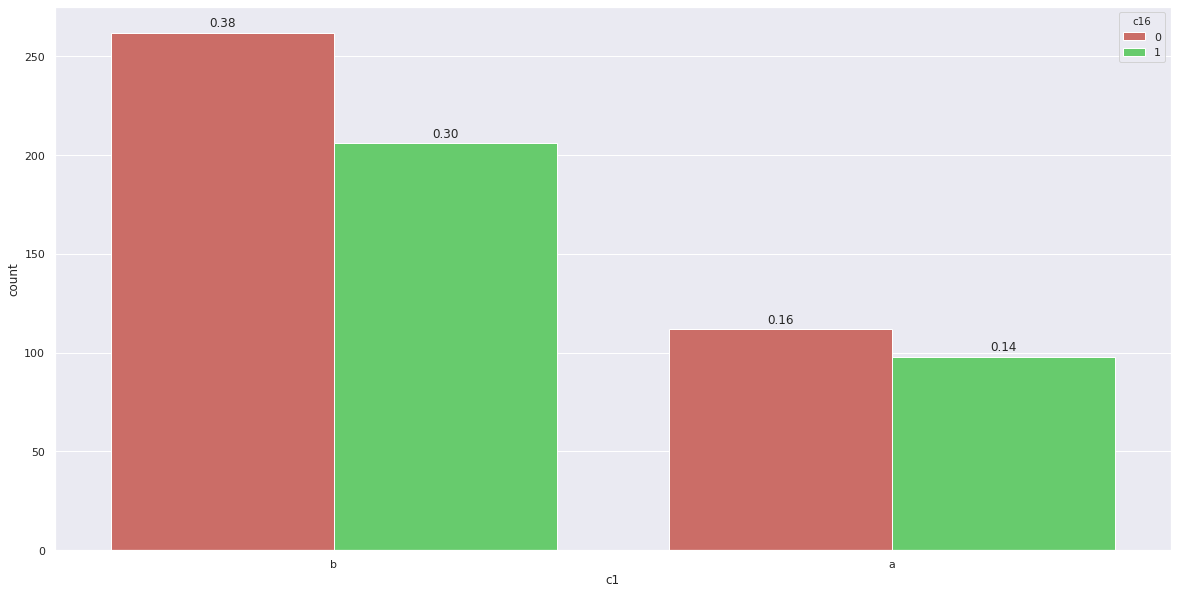

posx and posy should be finite values
posx and posy should be finite values


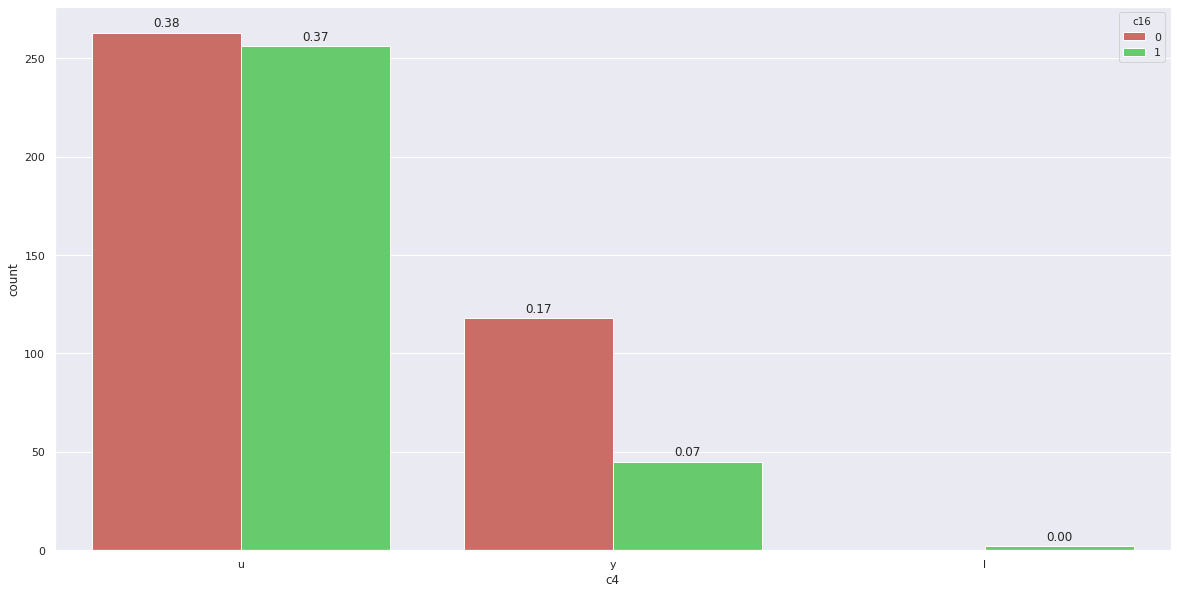

posx and posy should be finite values
posx and posy should be finite values


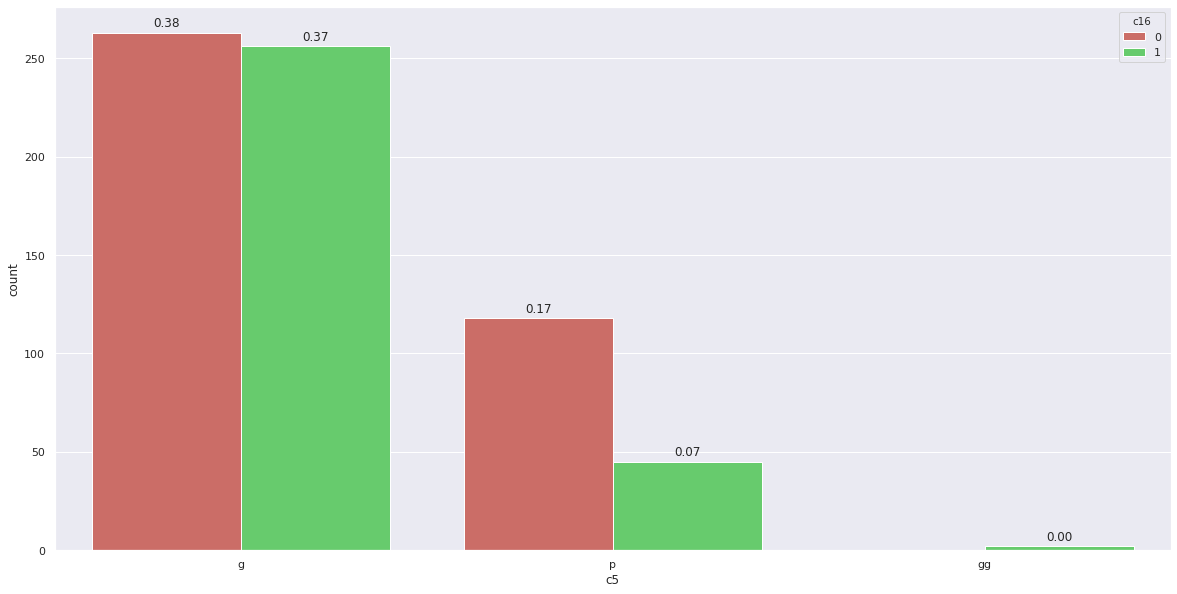

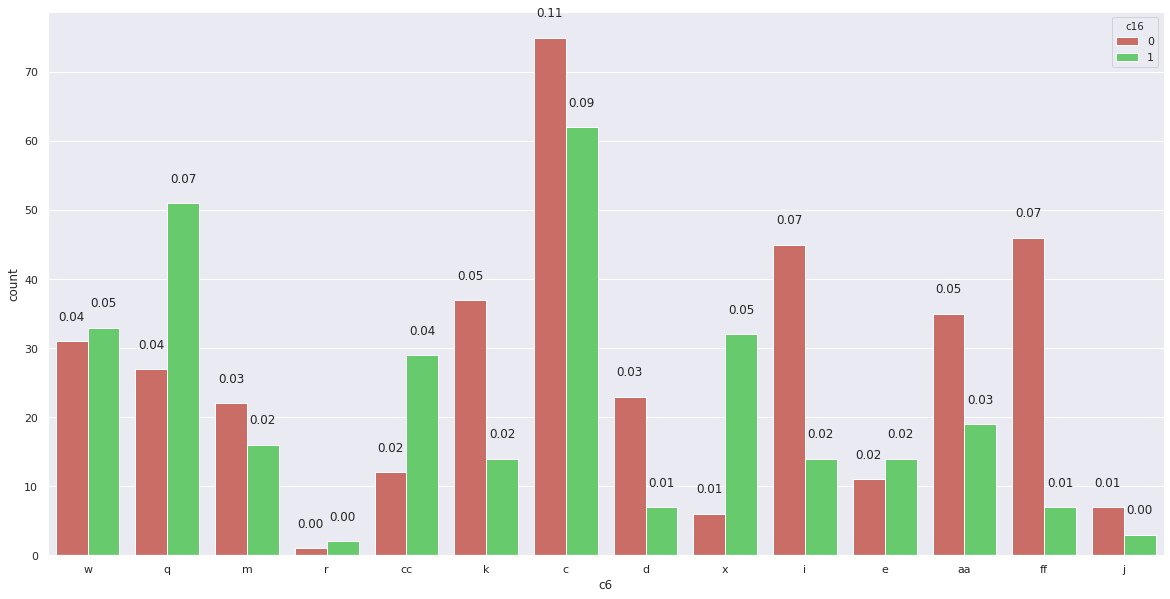

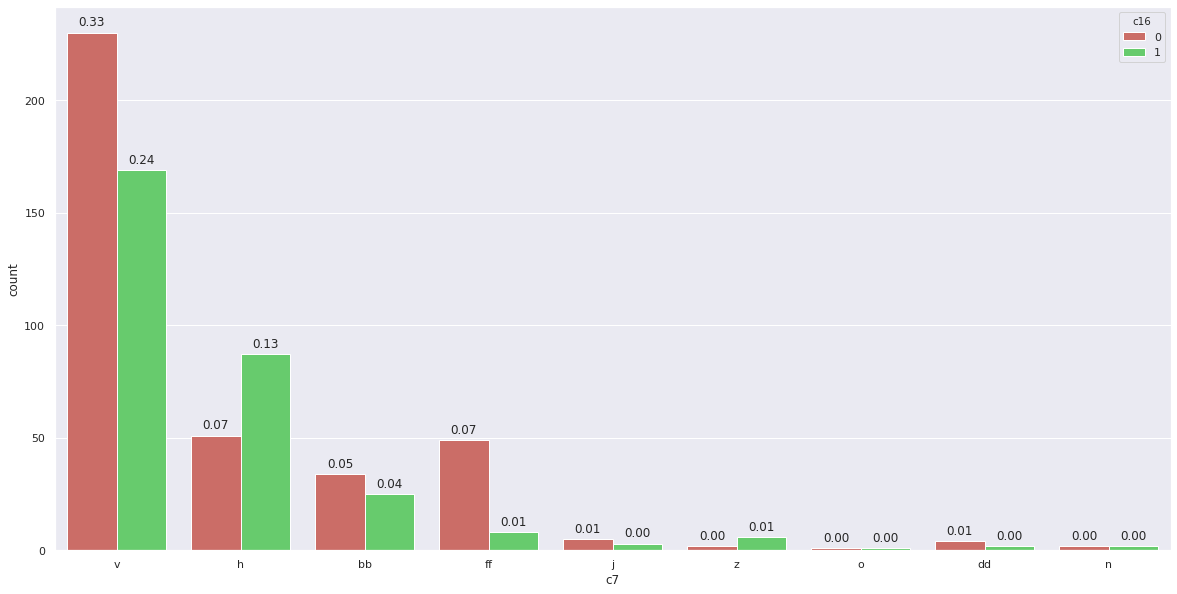

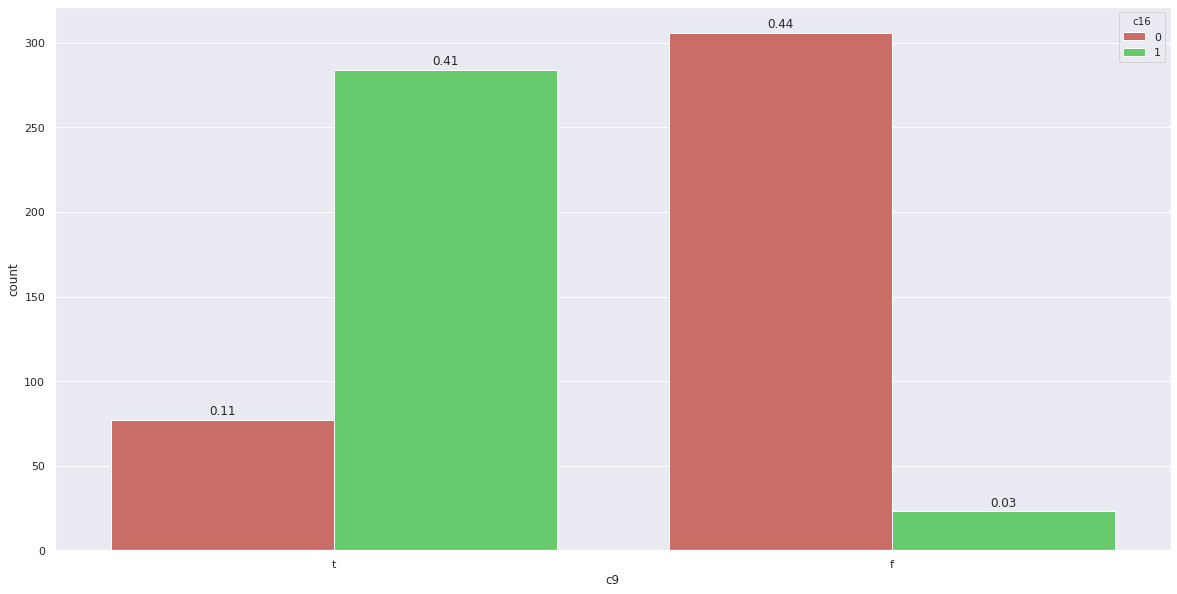

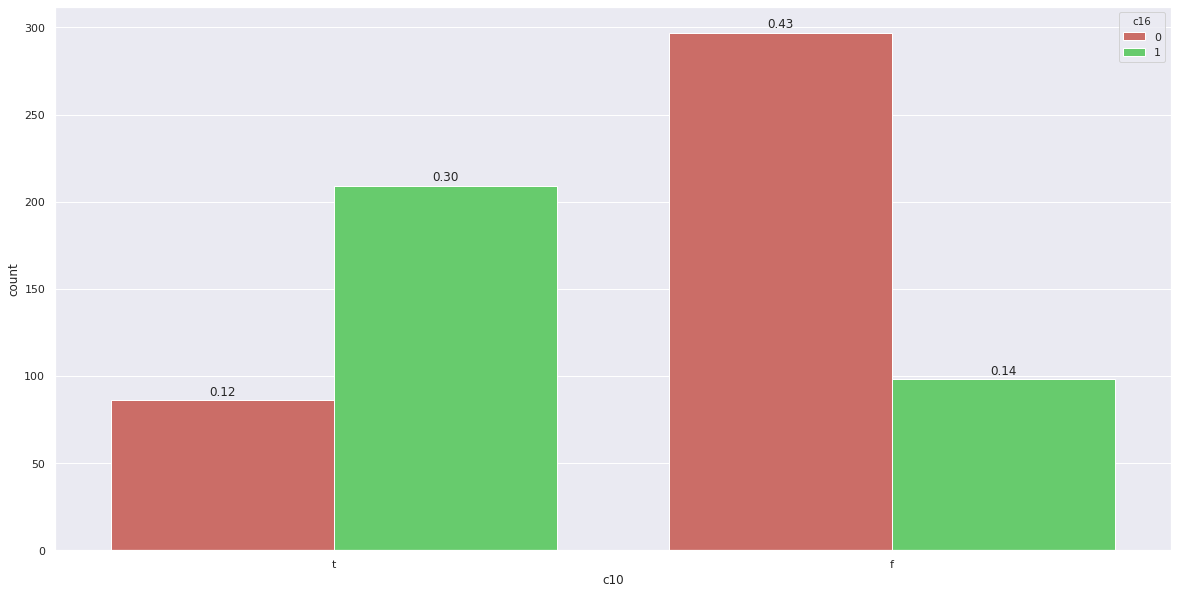

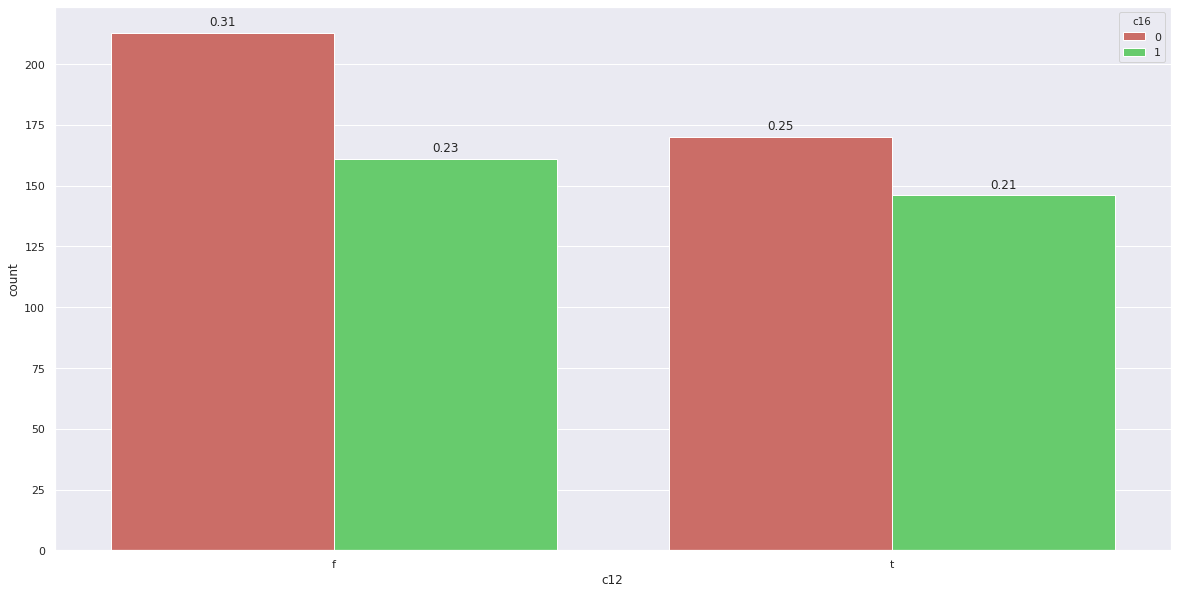

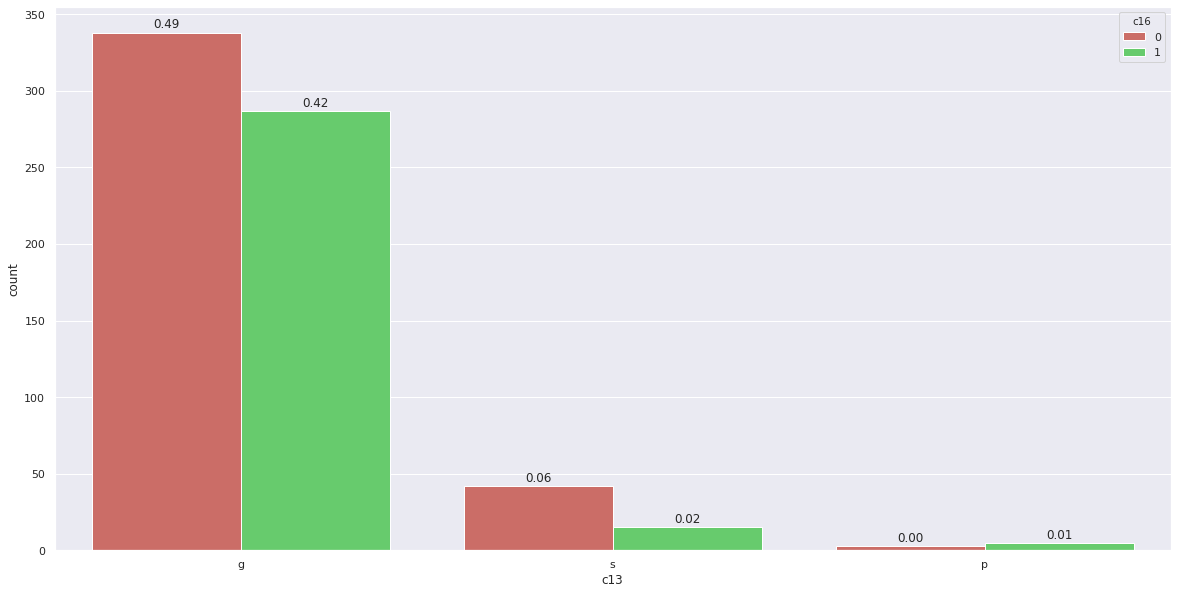

In [ ]:
for i in range(len(categorical)) :  
  sns.set(style="darkgrid")
  sns.set_palette("hls", 3)
  plt.figure(figsize=(20,10))
  ax = sns.countplot(x=categorical[i], hue="c16", data=crp_df)

  for p in ax.patches:
      height = p.get_height()
      ax.text(p.get_x()+p.get_width()/2.,
              height + 3,
              '{:1.2f}'.format(height/crp_df.shape[0]),
              ha="center") 

In [ ]:
credit_df.count()

690

In [ ]:
(train_data, test_data) = credit_df.randomSplit([0.8, 0.2], 24)

print("Records for training: " + str(train_data.count()))
print("Records for evaluation: " + str(test_data.count()))

Records for training: 550
Records for evaluation: 140


In [ ]:
from pyspark.ml import Pipeline
from pyspark.ml.feature import OneHotEncoderEstimator, StringIndexer, VectorAssembler
from pysparkling.ml import H2OAutoML

In [ ]:
train_data.persist()
test_data.cache()

DataFrame[c1: string, c2: double, c3: double, c4: string, c5: string, c6: string, c7: string, c8: double, c9: string, c10: string, c11: int, c12: string, c13: string, c14: int, c15: int, c16: int]

In [ ]:
automlEstimator = H2OAutoML(maxRuntimeSecs=60, splitRatio=0.9, labelCol="c16")

In [ ]:
h2Omodel = automlEstimator.fit(train_data)

In [ ]:
automlEstimator.getLeaderboard().show()

+--------------------+----------------------+-------------------+-------------------+-------------------+-------------------+
|            model_id|mean_residual_deviance|               rmse|                mse|                mae|              rmsle|
+--------------------+----------------------+-------------------+-------------------+-------------------+-------------------+
|XGBoost_2_AutoML_...|   0.09450787765640989| 0.3074213357208798|0.09450787765640989| 0.1947937456646351| 0.2167472129732668|
|XGBoost_grid__1_A...|   0.09454084047116486|0.30747494283463955|0.09454084047116486|0.19090142358433115|0.21563505585194975|
|StackedEnsemble_B...|   0.09455153100220838|  0.307492326737121|0.09455153100220838| 0.1970130672050659| 0.2157042029842747|
|XGBoost_3_AutoML_...|   0.09501671989368353|0.30824782220428343|0.09501671989368353|  0.188036868849186| 0.2172296162616296|
|XRT_1_AutoML_2020...|   0.09530201618540382| 0.3087102463239661|0.09530201618540382|0.19955872769129132| 0.2146949109

In [ ]:
predicted = h2Omodel.transform(test_data)

In [ ]:
predicted.take(10)

[Row(c1=None, c2=20.08, c3=0.125, c4='u', c5='g', c6='q', c7='v', c8=1.0, c9='f', c10='t', c11=1, c12='f', c13='g', c14=240, c15=768, c16=1, prediction=0.11943161487579346),
 Row(c1=None, c2=26.5, c3=2.71, c4='y', c5='p', c6=None, c7=None, c8=0.085, c9='f', c10='f', c11=0, c12='f', c13='s', c14=80, c15=0, c16=0, prediction=0.05603760480880737),
 Row(c1='a', c2=None, c3=3.5, c4='u', c5='g', c6='d', c7='v', c8=3.0, c9='t', c10='f', c11=0, c12='t', c13='g', c14=300, c15=0, c16=0, prediction=0.24706405401229858),
 Row(c1='a', c2=None, c3=11.25, c4='u', c5='g', c6='ff', c7='ff', c8=0.0, c9='f', c10='f', c11=0, c12='f', c13='g', c14=None, c15=5200, c16=0, prediction=0.11431396007537842),
 Row(c1='a', c2=16.0, c3=0.165, c4='u', c5='g', c6='aa', c7='v', c8=1.0, c9='f', c10='t', c11=2, c12='t', c13='g', c14=320, c15=1, c16=0, prediction=0.09709390997886658),
 Row(c1='a', c2=17.83, c3=11.0, c4='u', c5='g', c6='x', c7='h', c8=1.0, c9='t', c10='t', c11=11, c12='f', c13='g', c14=0, c15=3000, c16=1,

In [ ]:
h2Omodel.save('h2ospark.model')

In [ ]:
stages= []

In [ ]:
for catCol in categorical:

    stringIndexer = StringIndexer(inputCol=catCol, outputCol=catCol + "Index", handleInvalid="skip")

    encoder = OneHotEncoderEstimator(inputCols=[stringIndexer.getOutputCol()], outputCols=[catCol + "catVec"])

    stages += [stringIndexer, encoder]

In [ ]:
label_Idx = StringIndexer(inputCol="c16", outputCol="label")
stages += [label_Idx]

In [ ]:
stages

[StringIndexer_244ead64a055,
 OneHotEncoderEstimator_02278d43a5e2,
 StringIndexer_e1e9a6f6a39b,
 OneHotEncoderEstimator_a8e34f57fb56,
 StringIndexer_bdf970c9aa14,
 OneHotEncoderEstimator_85189dc4ab55,
 StringIndexer_8f01c86d27fc,
 OneHotEncoderEstimator_ecf438614b36,
 StringIndexer_a4cadd02470a,
 OneHotEncoderEstimator_90bcc9d7835e,
 StringIndexer_9743fe596b34,
 OneHotEncoderEstimator_b711da16b3bc,
 StringIndexer_329f5b39fcaa,
 OneHotEncoderEstimator_269b975b052d,
 StringIndexer_be8a95c024cf,
 OneHotEncoderEstimator_5923faa48c49,
 StringIndexer_da9094a6f004,
 OneHotEncoderEstimator_eaea80e2c44d,
 StringIndexer_a5bb9d222ddf]

In [ ]:
numericCols = ["c2", "c3","c8","c11","c14","c15"]
assembleInputs = assemblerInputs = [c + "catVec" for c in categorical] + numericCols
assembler = VectorAssembler(inputCols=assembleInputs, outputCol="features", handleInvalid="skip")
stages += [assembler]

In [ ]:
automlEstimator = H2OAutoML(maxRuntimeSecs=60, splitRatio=0.9, labelCol="c16")
stages += [automlEstimator]

In [ ]:
pipeline = Pipeline().setStages(stages)

In [ ]:
pipeline.getStages()

[StringIndexer_244ead64a055,
 OneHotEncoderEstimator_02278d43a5e2,
 StringIndexer_e1e9a6f6a39b,
 OneHotEncoderEstimator_a8e34f57fb56,
 StringIndexer_bdf970c9aa14,
 OneHotEncoderEstimator_85189dc4ab55,
 StringIndexer_8f01c86d27fc,
 OneHotEncoderEstimator_ecf438614b36,
 StringIndexer_a4cadd02470a,
 OneHotEncoderEstimator_90bcc9d7835e,
 StringIndexer_9743fe596b34,
 OneHotEncoderEstimator_b711da16b3bc,
 StringIndexer_329f5b39fcaa,
 OneHotEncoderEstimator_269b975b052d,
 StringIndexer_be8a95c024cf,
 OneHotEncoderEstimator_5923faa48c49,
 StringIndexer_da9094a6f004,
 OneHotEncoderEstimator_eaea80e2c44d,
 StringIndexer_a5bb9d222ddf,
 VectorAssembler_5c3a3b41ef8a,
 H2OAutoML_764d6891e86f]

In [ ]:
pipelinemodel = pipeline.fit(train_data)

In [ ]:
pipelinemodel.stages

[StringIndexer_244ead64a055,
 OneHotEncoderEstimator_02278d43a5e2,
 StringIndexer_e1e9a6f6a39b,
 OneHotEncoderEstimator_a8e34f57fb56,
 StringIndexer_bdf970c9aa14,
 OneHotEncoderEstimator_85189dc4ab55,
 StringIndexer_8f01c86d27fc,
 OneHotEncoderEstimator_ecf438614b36,
 StringIndexer_a4cadd02470a,
 OneHotEncoderEstimator_90bcc9d7835e,
 StringIndexer_9743fe596b34,
 OneHotEncoderEstimator_b711da16b3bc,
 StringIndexer_329f5b39fcaa,
 OneHotEncoderEstimator_269b975b052d,
 StringIndexer_be8a95c024cf,
 OneHotEncoderEstimator_5923faa48c49,
 StringIndexer_da9094a6f004,
 OneHotEncoderEstimator_eaea80e2c44d,
 StringIndexer_a5bb9d222ddf,
 VectorAssembler_5c3a3b41ef8a,
 StackedEnsemble_f856f8770f25]

In [ ]:
last_stage=pipelinemodel.stages[-1]
last_stage.getModelDetails()

'{\n  "names": [\n    "c1",\n    "c2",\n    "c3",\n    "c4",\n    "c5",\n    "c6",\n    "c7",\n    "c8",\n    "c9",\n    "c10",\n    "c11",\n    "c12",\n    "c13",\n    "c14",\n    "c15",\n    "c1Index",\n    "c1catVec0",\n    "c4Index",\n    "c4catVec0",\n    "c4catVec1",\n    "c5Index",\n    "c5catVec0",\n    "c5catVec1",\n    "c6Index",\n    "c6catVec0",\n    "c6catVec1",\n    "c6catVec2",\n    "c6catVec3",\n    "c6catVec4",\n    "c6catVec5",\n    "c6catVec6",\n    "c6catVec7",\n    "c6catVec8",\n    "c6catVec9",\n    "c6catVec10",\n    "c6catVec11",\n    "c6catVec12",\n    "c7Index",\n    "c7catVec0",\n    "c7catVec1",\n    "c7catVec2",\n    "c7catVec3",\n    "c7catVec4",\n    "c7catVec5",\n    "c7catVec6",\n    "c7catVec7",\n    "c9Index",\n    "c9catVec0",\n    "c10Index",\n    "c10catVec0",\n    "c12Index",\n    "c12catVec0",\n    "c13Index",\n    "c13catVec0",\n    "c13catVec1",\n    "label",\n    "features0",\n    "features1",\n    "features2",\n    "features3",\n    "features

In [ ]:
prediction = pipelinemodel.transform(test_data)

In [ ]:
prediction.take(15)

[Row(c1='a', c2=16.0, c3=0.165, c4='u', c5='g', c6='aa', c7='v', c8=1.0, c9='f', c10='t', c11=2, c12='t', c13='g', c14=320, c15=1, c16=0, c1Index=1.0, c1catVec=SparseVector(1, {}), c4Index=0.0, c4catVec=SparseVector(2, {0: 1.0}), c5Index=0.0, c5catVec=SparseVector(2, {0: 1.0}), c6Index=5.0, c6catVec=SparseVector(13, {5: 1.0}), c7Index=0.0, c7catVec=SparseVector(8, {0: 1.0}), c9Index=1.0, c9catVec=SparseVector(1, {}), c10Index=1.0, c10catVec=SparseVector(1, {}), c12Index=1.0, c12catVec=SparseVector(1, {}), c13Index=0.0, c13catVec=SparseVector(2, {0: 1.0}), label=0.0, features=SparseVector(37, {1: 1.0, 3: 1.0, 10: 1.0, 18: 1.0, 29: 1.0, 31: 16.0, 32: 0.165, 33: 1.0, 34: 2.0, 35: 320.0, 36: 1.0}), prediction=-0.005127872314956822),
 Row(c1='a', c2=17.83, c3=11.0, c4='u', c5='g', c6='x', c7='h', c8=1.0, c9='t', c10='t', c11=11, c12='f', c13='g', c14=0, c15=3000, c16=1, c1Index=1.0, c1catVec=SparseVector(1, {}), c4Index=0.0, c4catVec=SparseVector(2, {0: 1.0}), c5Index=0.0, c5catVec=SparseVe

In [ ]:
!nvidia-smi

Thu Mar  5 22:00:00 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 440.59       Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   69C    P0    29W /  70W |    151MiB / 15079MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  